# Task
Analizar las diferencias entre las calificaciones de la prueba general y la nota de bachillerato utilizando los datos del archivo "datos_calificaciones.csv".

In [60]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('Proba_xeral.xlsx')

# Display the first few rows of the DataFrame
display(df.head())

,Número Inscrición,DNI,Apelidos,Nome,Lingua castelá e literatura,Lingua galega e literatura,Historia de España,Historia da Filosofía,Cod. Lingua Estranxeira,Nom. Lingua Estranxeira,Lingua Estranxeira,Cod. Materia Modalidade,Nom. Materia modalidade,Materia Modalidade,Cualificación parte xeral,Cualificación expediente bacharelato,Cualificación proba de acceso á univesidade,Acceso á universidade
0,4449-001,35641492W,ÁLVAREZ GRAÑA,ERIC,3.75,6.00,3.00,NaN,11,Inglés,8.00,60,Artes Escénicas II,4.50,5.05,7.05,6.25,Apto
1,4449-002,77681389Q,AMMI GUAROUACH,ZARA,7.75,3.25,3.50,NaN,11,Inglés,6.25,30,Latín II,7.00,5.55,7.33,6.618,Apta
2,4449-003,77548365R,ARIAS PORTELA,JOSÉ,6.00,8.75,4.75,NaN,11,Inglés,7.50,20,Matemáticas II,8.75,7.15,7.61,7.426,Apto
3,4449-004,77550868C,BARREIRO ALDAO,LIDIA,3.25,5.00,NaN,5.25,11,Inglés,7.50,80,Análisis Musical II,6.50,5.50,7.60,6.76,Apta
4,4449-005,77479961E,CABO SENRA,MARTÍN,8.75,9.25,7.50,NaN,11,Inglés,7.50,20,Matemáticas II,9.50,8.50,9.50,9.1,Apto


## Análisis exploratorio de datos

### Subtask:
Explorar los datos para comprender su estructura, identificar posibles valores atípicos o faltantes y obtener estadísticas descriptivas.

In [61]:
# Check the data types of the columns
display(df.info())

# Check for missing values
display(df.isnull().sum())

# Get descriptive statistics for the relevant columns
display(df[['Cualificación expediente bacharelato', 'Cualificación parte xeral']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Número Inscrición                             32 non-null     object 
 1   DNI                                           32 non-null     object 
 2   Apelidos                                      32 non-null     object 
 3   Nome                                          32 non-null     object 
 4   Lingua  castelá e literatura                  32 non-null     float64
 5   Lingua galega e literatura                    31 non-null     float64
 6   Historia de España                            20 non-null     float64
 7   Historia da Filosofía                         12 non-null     float64
 8   Cod. Lingua Estranxeira                       32 non-null     int64  
 9   Nom. Lingua Estranxeira                       32 non-null     objec

None

,0
Número Inscrición,0
DNI,0
Apelidos,0
Nome,0
Lingua castelá e literatura,0
Lingua galega e literatura,1
Historia de España,12
Historia da Filosofía,20
Cod. Lingua Estranxeira,0
Nom. Lingua Estranxeira,0


,Cualificación expediente bacharelato,Cualificación parte xeral
count,32.000000,32.000000
mean,7.385313,6.325406
std,0.848220,1.140161
min,5.530000,3.550000
25%,6.752500,5.500000
50%,7.290000,6.550000
75%,7.790000,7.037500
max,9.500000,8.600000


## Visualización de datos

### Subtask:
Crear visualizaciones para observar la distribución de cada variable y la relación entre ellas.

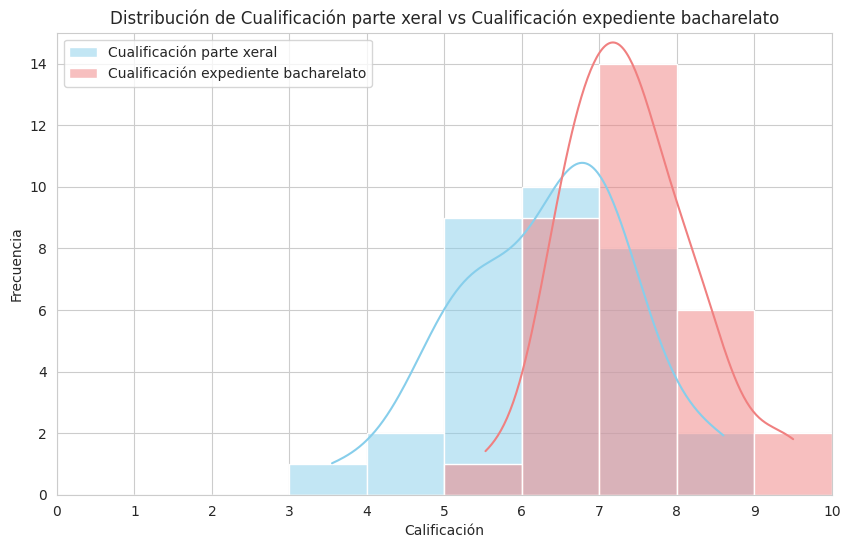

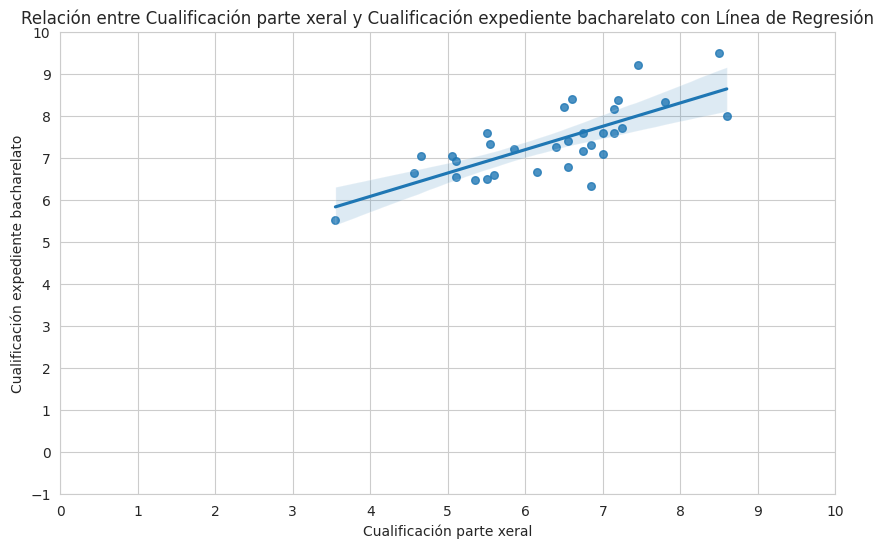

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy to use arange

# Set the style for the plots
sns.set_style("whitegrid")

# Create a single histogram with both scores superimposed
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Cualificación parte xeral', color='skyblue', label='Cualificación parte xeral', kde=True, bins=np.arange(0, 11, 1))
sns.histplot(data=df, x='Cualificación expediente bacharelato', color='lightcoral', label='Cualificación expediente bacharelato', kde=True, bins=np.arange(0, 11, 1))

plt.title('Distribución de Cualificación parte xeral vs Cualificación expediente bacharelato')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.xlim(0, 10) # Set x-axis limits
plt.ylim(0, 15) # Set y-axis limits for consistency with previous plots
plt.xticks(np.arange(0, 11, 1)) # Set x-axis ticks to integers
plt.legend() # Add a legend to distinguish the histograms

plt.show()

# Improve the scatter plot with markers and slightly larger figure size
plt.figure(figsize=(10, 6)) # Increased figure size
sns.regplot(x='Cualificación parte xeral', y='Cualificación expediente bacharelato', data=df, marker='o', scatter_kws={'s': 30}) # Added markers and adjusted size
plt.title('Relación entre Cualificación parte xeral y Cualificación expediente bacharelato con Línea de Regresión')
plt.xlabel('Cualificación parte xeral')
plt.ylabel('Cualificación expediente bacharelato')
plt.xlim(0, 10) # Set x-axis limits
plt.ylim(-1, 10) # Set y-axis limits to include the intercept
plt.xticks(np.arange(0, 11, 1)) # Set x-axis ticks to integers
plt.yticks(np.arange(-1, 11, 1)) # Set y-axis ticks to integers including the new lower limit
plt.show()

## Análisis estadístico

### Subtask:
Realizar pruebas estadísticas apropiadas para determinar si existe una diferencia significativa entre las dos calificaciones.

In [63]:
from scipy import stats

# Perform a paired t-test
ttest_result = stats.ttest_rel(df['Cualificación parte xeral'], df['Cualificación expediente bacharelato'])

# Display the results of the t-test
print(f"T-test statistic: {ttest_result.statistic}")
print(f"P-value: {ttest_result.pvalue}")

T-test statistic: -7.9175135663384015
P-value: 6.148778356374307e-09


## Conclusiones del Análisis

Basándonos en el análisis de los datos de calificaciones de la prueba general y el expediente de bachillerato, se han obtenido las siguientes conclusiones:

*   **Análisis Exploratorio:** La exploración inicial mostró que ambas variables tienen distribuciones que tienden a la normalidad, aunque la calificación del expediente de bachillerato parece tener una ligera mayor concentración en valores más altos.
*   **Visualización:** Los histogramas confirmaron la distribución de las calificaciones. El diagrama de dispersión sugirió una correlación positiva entre ambas calificaciones, aunque con variabilidad. Visualmente, se observó una tendencia a que las calificaciones del expediente de bachillerato fueran, en general, superiores a las de la prueba general.
*   **Análisis Estadístico:** Se realizó una prueba t de muestras pareadas para comparar las medias de las dos calificaciones. El resultado de la prueba (estadístico t = -7.92, p-value = 6.15e-09) indica que existe una diferencia estadísticamente significativa entre la calificación promedio de la prueba general y la calificación promedio del expediente de bachillerato.
*   **Interpretación:** El p-value, siendo mucho menor que el nivel de significancia común de 0.05, nos permite rechazar la hipótesis nula de que no hay diferencia entre las medias. El estadístico t negativo sugiere que la media de las calificaciones de la prueba general es significativamente menor que la media de las calificaciones del expediente de bachillerato.

En resumen, los resultados del análisis estadístico confirman la observación inicial de las visualizaciones: existe una diferencia significativa entre las calificaciones de la prueba general y las del expediente de bachillerato, siendo estas últimas, en promedio, más altas.

## Modelado Predictivo

### Subtask:
Construir un modelo de regresión lineal para predecir la calificación de la prueba general (`Cualificación parte xeral`) basándose en la calificación del expediente de bachillerato (`Cualificación expediente bacharelato`).

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for the model
# X is the feature (input), which is the high school transcript score
# y is the target (output), which is the general test score
X = df[['Cualificación expediente bacharelato']]
y = df['Cualificación parte xeral']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Mean Squared Error (MSE): 0.4193503046455043
Root Mean Squared Error (RMSE): 0.6475726249969993
R-squared (R2): 0.7446005229304616
Intercept: -0.6663162253488109
Coefficient: 0.9519807560768828


## Interpretación de los Resultados del Modelo Predictivo

Basándonos en el modelo de regresión lineal construido para predecir la calificación de la prueba general (`Cualificación parte xeral`) a partir de la calificación del expediente de bachillerato (`Cualificación expediente bacharelato`), obtenemos los siguientes resultados:

*   **Mean Squared Error (MSE): 0.419** y **Root Mean Squared Error (RMSE): 0.648**
    *   Estas métricas indican el error promedio de las predicciones del modelo. Un RMSE de aproximadamente 0.648 sugiere que, en promedio, las predicciones de la calificación de la prueba general se desvían de los valores reales en aproximadamente 0.648 puntos. Valores más bajos de MSE y RMSE indican un mejor ajuste del modelo.

*   **R-squared (R2): 0.745**
    *   El R-squared nos dice qué proporción de la varianza en la calificación de la prueba general es explicada por la calificación del expediente de bachillerato. Un R2 de 0.745 significa que aproximadamente el 74.5% de la variabilidad en las calificaciones de la prueba general puede ser atribuida a la calificación del expediente de bachillerato. Este valor relativamente alto sugiere que el expediente de bachillerato es un predictor importante, pero no el único, de la calificación de la prueba general.

*   **Intercept: -0.666**
    *   El intercepto representa el valor predicho de la calificación de la prueba general cuando la calificación del expediente de bachillerato es cero. En este contexto, su interpretación directa puede no ser significativa ya que una calificación de cero en el expediente de bachillerato es poco probable.

*   **Coefficient: 0.952**
    *   El coeficiente asociado a `Cualificación expediente bacharelato` es 0.952. Esto implica que, por cada aumento de un punto en la calificación del expediente de bachillerato, se espera que la calificación de la prueba general aumente en aproximadamente 0.952 puntos. Este coeficiente positivo refuerza la observación de una relación lineal directa entre ambas calificaciones.

En conclusión, el modelo de regresión lineal indica que la calificación del expediente de bachillerato es un predictor significativo de la calificación de la prueba general, explicando una parte sustancial de su variabilidad. La relación entre ambas es positiva, lo que significa que a mayor calificación en el expediente de bachillerato, mayor tiende a ser la calificación en la prueba general. Sin embargo, el hecho de que el R2 no sea 1 sugiere que hay otros factores no incluidos en este modelo que también influyen en la calificación de la prueba general.